In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
df = pd.read_csv("teen_phone_addiction_dataset.csv")
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [ ]:
df

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Jesus Yates,16,Female,New Jennifer,12th,3.9,6.4,53,4,...,0.3,80,15,2.7,1.8,1.0,Other,8,9.4,9.8
2996,2997,Bethany Murray,13,Female,Richardport,8th,3.6,7.3,93,5,...,0.9,45,8,3.1,0.0,0.3,Gaming,9,5.2,5.5
2997,2998,Norman Hughes,14,Other,Rebeccaton,7th,3.2,6.5,98,1,...,0.2,51,13,2.4,0.2,2.4,Social Media,9,5.9,6.2
2998,2999,Barbara Hinton,17,Female,Ramirezmouth,9th,6.7,7.5,67,3,...,1.6,125,17,1.7,2.6,1.5,Browsing,4,6.1,10.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

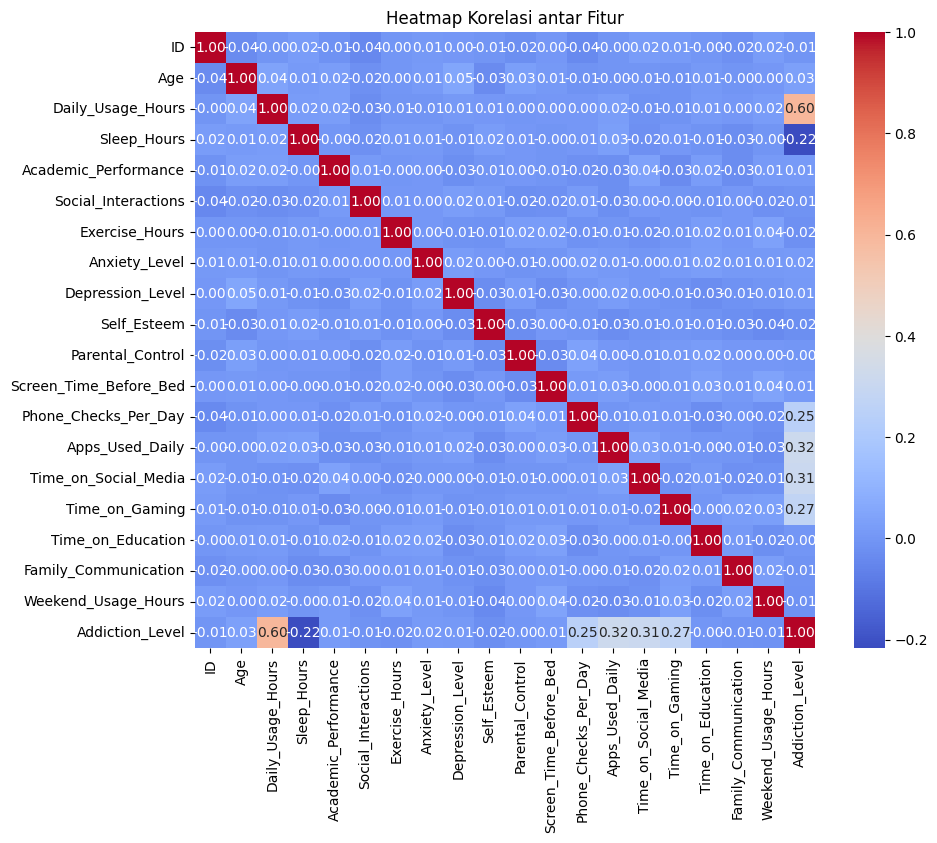

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
korelasi = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi antar Fitur")
plt.show()

In [ ]:
df.describe()

,ID,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,15.969667,5.020667,6.489767,74.947333,5.097667,1.040667,5.590000,5.460333,5.546333,0.507333,1.006733,83.093000,12.609333,2.499233,1.525267,1.016333,5.459667,6.015100,8.881900
std,866.169729,1.989489,1.956501,1.490713,14.684156,3.139333,0.734620,2.890678,2.871557,2.860754,0.500030,0.492878,37.747044,4.611486,0.988201,0.932701,0.648341,2.864572,2.014776,1.609598
min,1.000000,13.000000,0.000000,3.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,750.750000,14.000000,3.700000,5.500000,62.000000,2.000000,0.500000,3.000000,3.000000,3.000000,0.000000,0.700000,51.000000,9.000000,1.800000,0.800000,0.500000,3.000000,4.700000,8.000000
50%,1500.500000,16.000000,5.000000,6.500000,75.000000,5.000000,1.000000,6.000000,5.000000,6.000000,1.000000,1.000000,82.000000,13.000000,2.500000,1.500000,1.000000,5.000000,6.000000,10.000000
75%,2250.250000,18.000000,6.400000,7.500000,88.000000,8.000000,1.500000,8.000000,8.000000,8.000000,1.000000,1.400000,115.250000,17.000000,3.200000,2.200000,1.500000,8.000000,7.400000,10.000000
max,3000.000000,19.000000,11.500000,10.000000,100.000000,10.000000,4.000000,10.000000,10.000000,10.000000,1.000000,2.600000,150.000000,20.000000,5.000000,4.000000,3.000000,10.000000,14.000000,10.000000


In [ ]:
# Mengecek data yang kosong menggunakan isnull().sum()
df.isnull().sum()

,0
ID,0
Name,0
Age,0
Gender,0
Location,0
School_Grade,0
Daily_Usage_Hours,0
Sleep_Hours,0
Academic_Performance,0
Social_Interactions,0


In [ ]:
# Mengecek data duplikat menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(0)

In [ ]:
# Hapus kolom yang tidak relevan
df_model = df.drop(columns=["ID", "Name", "Location"])

In [ ]:
# Encode kolom kategorikal
categorical_cols = df_model.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Pisahkan fitur (X) dan target (y)
X = df_model.drop(columns=["Addiction_Level"])
y = df_model["Addiction_Level"]

# Split data train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Modeling
model = RandomForestRegressor(
    random_state=42, n_estimators=100
)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

In [ ]:
# Evaluasi Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== Evaluation Results ===")
print("MSE  :", mse)
print("RMSE :", rmse)
print("MAE  :", mae)
print("R2   :", r2)


=== Evaluation Results ===
MSE  : 0.33648481833333344
RMSE : 0.5800731146444674
MAE  : 0.39502833333333354
R2   : 0.8664378786387947


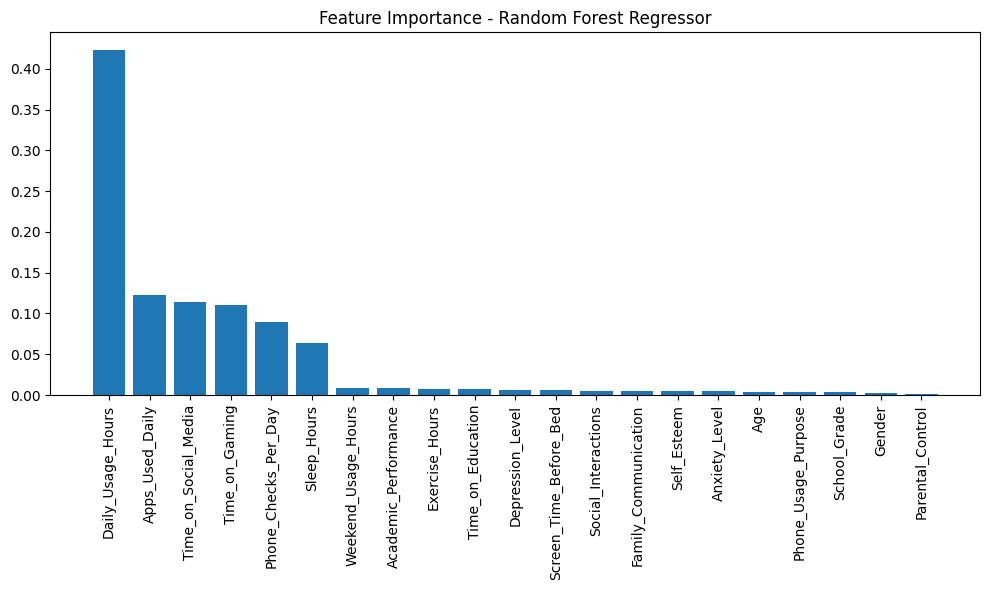

In [ ]:
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns

# Urutkan berdasarkan importance
indices = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in indices]

# Plot feature importance
plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), sorted_features, rotation=90)
plt.title("Feature Importance - Random Forest Regressor")
plt.tight_layout()
plt.show()

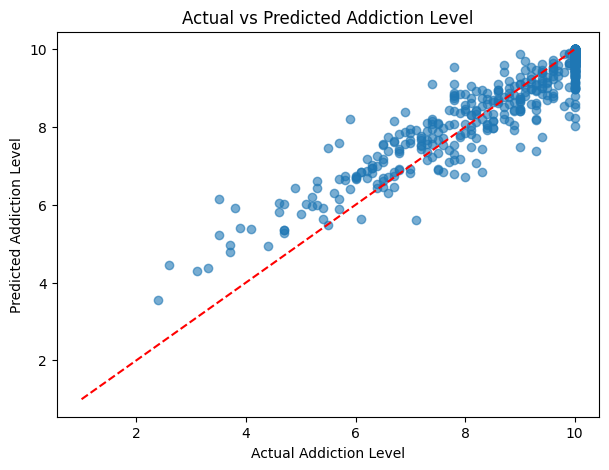

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Addiction Level")
plt.ylabel("Predicted Addiction Level")
plt.title("Actual vs Predicted Addiction Level")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # garis ideal
plt.show()